In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_mass = pd.read_csv('../../data/cleaned_data.csv')
df_hd1 = pd.read_csv('../../data/HD/Deschutes_2024/Deschutes_2024_cleaned.csv')
df_hd2 = pd.read_csv('../../data/HD/Petaluma_2022/Petaluma_2022_cleaned.csv')
df_hd3 = pd.read_csv('../../data/HD/Eugene_2020/Eugene_2020_cleaned.csv')

# drop unneeded features
df_mass = df_mass.drop(['Code','VISIBLE_MINORITY','WHITE','BLACK','POC','LANGUAGE','NEWCOMER','INCOME-PROXY'],axis=1)
df_hd1 = df_hd1.drop(['Code','Initially Selected', 'Alternate', 'Dropped_Inclusive','Party'],axis=1)
df_hd2 = df_hd2.drop(['Code','Initially Selected', 'Alternate', 'Dropped_Inclusive'],axis=1)
df_hd3 = df_hd3.drop(['Code','Initially Selected', 'Alternate'],axis=1)


# AGE {Young Adult, Middle Age, Retirement age}
mass_age_mapping = {
    1: "Young Adult",
    2: "Middle Age",
    3: "Middle Age",
    4: "Retirement Age",
    5: "Retirement Age"
}
df_mass['AGE'] = df_mass['AGE'].map(mass_age_mapping)

hd_age_mapping ={
    '16-24': "Young Adult",
    '25-34': "Young Adult",
    '35-44': "Middle Age",
    '45-54': "Middle Age",
    '55-64': "Middle Age",
    '65-74': "Retirement Age",
    '75_and_up': "Retirement Age"
}
df_hd1['Age Range'] = df_hd1['Age Range'].map(hd_age_mapping)
df_hd2['Age Range'] = df_hd2['Age Range'].map(hd_age_mapping)
df_hd3['Age Range'] = df_hd3['Age Range'].map(hd_age_mapping)



# GENDER {Male, Female, Other} ##########
mass_gender_mapping = {
    'NonCis': "Other",
        'Female': "Female",
    'Male': "Male"
}
df_mass['GENDER'] = df_mass['GENDER'].map(mass_gender_mapping)


hd_gender_mapping = {
    "Another gender identity": "Other",
    'Female': "Female",
    'Male': "Male",
}
df_hd1['Gender'] = df_hd1['Gender'].map(hd_gender_mapping)
df_hd2['Gender'] = df_hd2['Gender'].map(hd_gender_mapping)
df_hd3['Gender'] = df_hd3['Gender'].map(hd_gender_mapping)



# HOUSING {Own, Rent, Subsidized/Unhoused} ##########
mass_housing_mapping = {
    'own': "Own",
    'rent': "Rent",
    'subsidized or unstable': "Subsidized/Unhoused",
}
df_mass['HOUSING'] = df_mass['HOUSING'].map(mass_housing_mapping)


hd_housing_mapping = {
    'Own': 'Own',
    'Rent': 'Rent',
    'Unhoused': "Subsidized/Unhoused",
}
df_hd1['Housing Status'] = df_hd1['Housing Status'].map(hd_housing_mapping)
df_hd2['Housing Status'] = df_hd2['Housing Status'].map(hd_housing_mapping)
df_hd3['Housing Status'] = df_hd3['Housing Status'].map(hd_housing_mapping)



# INCOME ##########
mass_income_mapping = {
    1: "Lower Income",
    2: "Lower Income",
    3: "Higher Income",
    4: "Higher Income",
}
df_mass['INCOME-PROXY-STRONG'] = df_mass['INCOME-PROXY-STRONG'].map(mass_income_mapping)


# INDIGENOUS {Yes, No}  ##########
df_hd1['INDIGENOUS'] = np.where(df_hd1['Race/Ethnicity'].isna(), np.nan,
                                np.where(df_hd1['Race/Ethnicity'] == 'Native_American', 'Yes', 'No'))
df_hd2['INDIGENOUS'] = np.where(df_hd2['Race/Ethnicity'].isna(), np.nan,
                                np.where(df_hd2['Race/Ethnicity'] == 'Native_American', 'Yes', 'No'))
df_hd3['INDIGENOUS'] = np.where(df_hd3['Race/Ethnicity'].isna(), np.nan,
                                np.where(df_hd3['Race/Ethnicity'] == 'Native_American', 'Yes', 'No'))

# RACIAL MINORITY {Yes, No}  ##########
df_hd1['RACIAL_MINORITY'] = np.where(df_hd1['Race/Ethnicity'].isna(), np.nan,
                                     np.where(df_hd1['Race/Ethnicity'] != 'White', 'Yes', 'No'))
df_hd2['RACIAL_MINORITY'] = np.where(df_hd2['Race/Ethnicity'].isna(), np.nan,
                                     np.where(df_hd2['Race/Ethnicity'] != 'White', 'Yes', 'No'))
df_hd3['RACIAL_MINORITY'] = np.where(df_hd3['Race/Ethnicity'].isna(), np.nan,
                                     np.where(df_hd3['Race/Ethnicity'] != 'White', 'Yes', 'No'))

df_hd1 = df_hd1.drop(['Race/Ethnicity'],axis=1)
df_hd2 = df_hd2.drop(['Race/Ethnicity'],axis=1)
df_hd3 = df_hd3.drop(['Race/Ethnicity'],axis=1)



def recode(value):
    if value == 0:
        return 'No'
    elif value == 1:
        return 'Yes'
    return value  # To preserve any data that is not 0 or 1 unchanged

# Apply the function using applymap to specified columns
df_mass[['INDIGENOUS', 'RACIAL_MINORITY', 'DISABILITY']] = df_mass[['INDIGENOUS', 'RACIAL_MINORITY', 'DISABILITY']].applymap(recode)




# DATA_ID ##########
df_hd1['DATA_ID'] = 'DESCHUTES'
df_hd2['DATA_ID'] = 'PETALUMA'
df_hd3['DATA_ID'] = 'EUGENE'


# DROPPED ##########
# df_mass['DROPPED'] = np.where(df_mass['STATUS'].isna(), 
#                               np.nan,  # Preserve NaN where 'STATUS' is NaN
#                               np.where(df_mass['STATUS'] == 'Selected, dropped out', 1, 0))
df_mass['DROPPED'] = np.where(df_mass['STATUS'] == 'Not selected', np.nan,
                              np.where(df_mass['STATUS'] == 'Selected, dropped out', 1, 0))
df_mass = df_mass.drop(['STATUS'],axis=1)

hd_dropped_mapping = {
    'YES': 1,
    'NO':0
}
df_hd1['Dropped'] = df_hd1['Dropped'].map(hd_dropped_mapping)
df_hd2['Dropped'] = df_hd2['Dropped'].map(hd_dropped_mapping)
df_hd3['Dropped'] = df_hd3['Dropped'].map(hd_dropped_mapping)





#### RENAME ALL VARIABLES TO BE COMMON

# Dictionary mapping old column names to new column names
hd_rename_columns = {
    'Gender': 'GENDER',
    'Age Range': 'AGE',
    'Housing Status': 'HOUSING',
    'Disability': 'DISABILITY',
    'Educational Attainment':'EDUCATION',
    'Dropped':'DROPPED'
}

# Rename all columns using the dictionary
df_hd1.rename(columns=hd_rename_columns, inplace=True)
df_hd2.rename(columns=hd_rename_columns, inplace=True)
df_hd3.rename(columns=hd_rename_columns, inplace=True)

mass_rename_columns = {'INCOME-PROXY-STRONG':'INCOME'}
df_mass.rename(columns=mass_rename_columns, inplace=True)


print()
# construct gender, age, racial minority, and housing across datasets
print(list(df_mass))
print(list(df_hd1))
print(list(df_hd2))
print(list(df_hd3))


#### MERGE DATASETS
df_merged = pd.concat([df_mass,df_hd1,df_hd2,df_hd3], ignore_index=True)

# Display the merged DataFrame
print(df_merged)


['GENDER', 'AGE', 'INDIGENOUS', 'RACIAL_MINORITY', 'DISABILITY', 'HOUSING', 'INCOME', 'DATA_ID', 'DROPPED']
['AGE', 'HOUSING', 'GENDER', 'EDUCATION', 'DROPPED', 'INDIGENOUS', 'RACIAL_MINORITY', 'DATA_ID']
['AGE', 'DISABILITY', 'HOUSING', 'GENDER', 'EDUCATION', 'DROPPED', 'INDIGENOUS', 'RACIAL_MINORITY', 'DATA_ID']
['HOUSING', 'AGE', 'GENDER', 'DISABILITY', 'EDUCATION', 'DROPPED', 'INDIGENOUS', 'RACIAL_MINORITY', 'DATA_ID']
      GENDER             AGE INDIGENOUS RACIAL_MINORITY DISABILITY HOUSING  \
0       Male      Middle Age        NaN              No        NaN     NaN   
1       Male      Middle Age        NaN              No        NaN     NaN   
2     Female      Middle Age        NaN              No        NaN     NaN   
3     Female     Young Adult        NaN              No        NaN     NaN   
4     Female      Middle Age        NaN             Yes        NaN     NaN   
...      ...             ...        ...             ...        ...     ...   
6554    Male     Young Adu

In [39]:
for column in df_merged.columns:
    unique_values = df_merged[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'GENDER': ['Male' 'Female' nan 'Other']
Unique values in 'AGE': ['Middle Age' 'Young Adult' 'Retirement Age' nan]
Unique values in 'INDIGENOUS': [nan 'No' 'Yes']
Unique values in 'RACIAL_MINORITY': ['No' 'Yes' nan]
Unique values in 'DISABILITY': [nan 'No' 'Yes']
Unique values in 'HOUSING': [nan 'Own' 'Rent' 'Subsidized/Unhoused']
Unique values in 'INCOME': [nan 'Higher Income' 'Lower Income']
Unique values in 'DATA_ID': ['AAZ' 'ABD' 'ABI' 'ABB' 'ABA' 'ABC' 'ABP' 'ABG' 'ABJ' 'ABS' 'ABX' 'ABL'
 'ABZ' 'ABU' 'ABR' 'ABT' 'ABY' 'ABK' 'ABQ' 'ACA' 'ABE' 'ACB' 'DESCHUTES'
 'PETALUMA' 'EUGENE']
Unique values in 'DROPPED': [ 1.  0. nan]
Unique values in 'EDUCATION': [nan 'Bachelors' 'Some_college' 'High_school' 'Some_schooling']


col: GENDER, col_max_avg: 0.20512820512820512
col: AGE, col_max_avg: 0.15
col: INDIGENOUS, col_max_avg: 0.75
col: RACIAL_MINORITY, col_max_avg: 0.21875
col: DISABILITY, col_max_avg: 0.19230769230769232
col: HOUSING, col_max_avg: 0.22857142857142856
col: INCOME, col_max_avg: 0.11538461538461539
col: EDUCATION, col_max_avg: 0.3333333333333333
[0.20512820512820512, 0.20512820512820512, 0.20512820512820512, 0.15, 0.15, 0.15, 0.75, 0.75, 0.21875, 0.21875, 0.19230769230769232, 0.19230769230769232, 0.22857142857142856, 0.22857142857142856, 0.22857142857142856, 0.11538461538461539, 0.11538461538461539, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333]


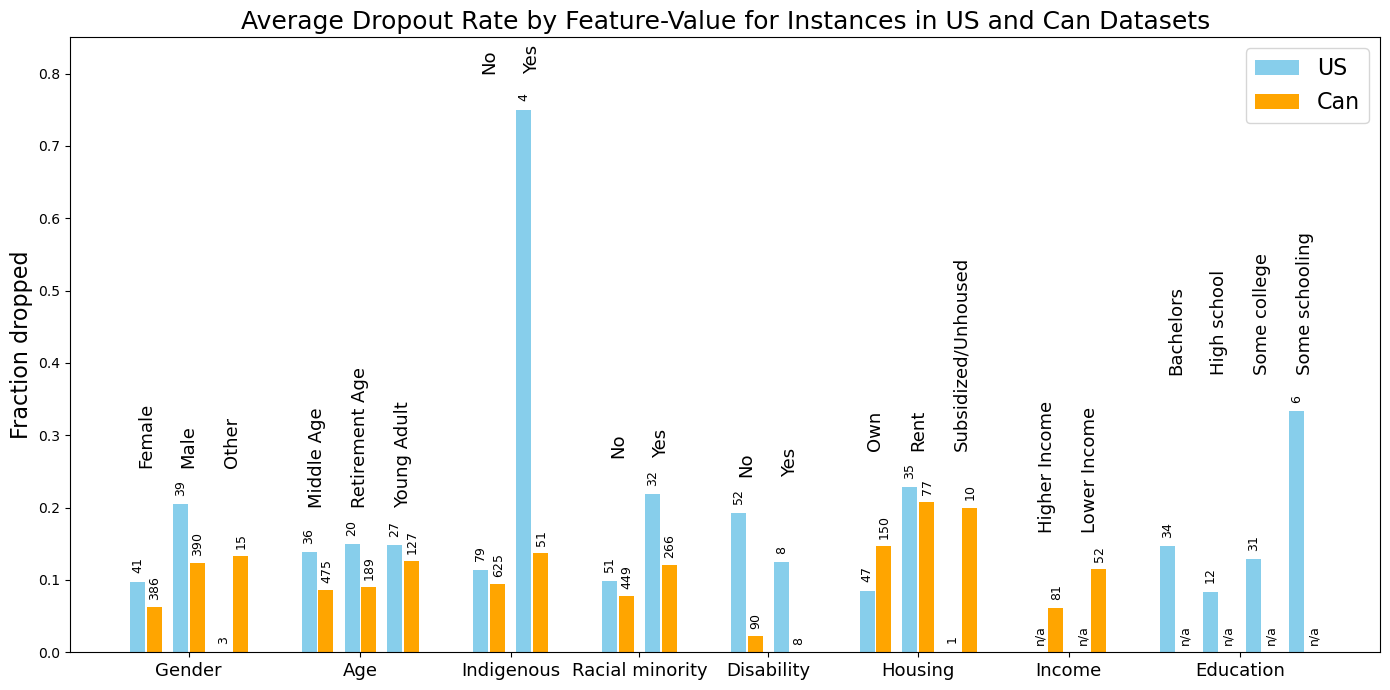

In [40]:
# Function to process each column individually
def process_column(column, df):
    unique_values = df[column].dropna().unique()
    # print(unique_values)
    results = {}
    counts = {}
    
    for value in unique_values:
        mask = df[column] == value
        filtered_data = df.loc[mask, 'DROPPED']
        results[value] = filtered_data.mean()
        counts[value] = filtered_data.notna().sum()  # Correctly count the occurrences of each value
        
    return results, counts

instances_in_dataset = {'US': ['DESCHUTES', 'PETALUMA', 'EUGENE'], 'MASS_ALDFC': ["ABG", "ABI", "ABP", "ABQ", "ABS", "ABU"], 'MASS_ALDFN': 
    ["ABY", "ABZ", "ACA", "ACB"], 'Can': ['AAZ', 'ABD', 'ABI', 'ABB', 'ABA', 'ABC', 'ABP', 'ABG', 'ABJ', 'ABS', 'ABX', 'ABL', 'ABZ', 'ABU', 'ABR', 'ABT', 'ABY', 'ABK', 'ABQ', 'ACA', 'ABE', 'ACB']}

def plot_drop_rates(dataset1, dataset2):
    columns_to_process = ['GENDER', 'AGE', 'INDIGENOUS', 'RACIAL_MINORITY', 'DISABILITY', 'HOUSING', 'INCOME', 'EDUCATION']
    colors = {dataset1: 'skyblue', dataset2: 'orange'}

    # Prepare data for plotting
    all_values = []
    all_averages = {dataset1: [], dataset2: []}
    all_counts = {dataset1: [], dataset2: []}
    value_labels = []
    column_labels = []
    positions = []
    column_positions = []
    current_position = 0

    col_max = []
    for col in columns_to_process:
        results1, counts1 = process_column(col, df_merged[df_merged['DATA_ID'].isin(instances_in_dataset[dataset1])])
        results2, counts2 = process_column(col, df_merged[df_merged['DATA_ID'].isin(instances_in_dataset[dataset2])])
        
        unique_values = sorted(set(results1.keys()).union(set(results2.keys())))
        values_positions = list(range(current_position, current_position + len(unique_values)))
        col_max_avg = 0
        for value, pos in zip(unique_values, values_positions):
            positions.append(pos)
            v1 = results1.get(value, 0)
            v2 = results2.get(value, 0)
            all_averages[dataset1].append(v1)
            all_averages[dataset2].append(v2)
            col_max_avg = max(col_max_avg, v1, v2)
            all_counts[dataset1].append(counts1.get(value, 0))
            all_counts[dataset2].append(counts2.get(value, 0))
            value_labels.append(f'{value}')
        print(f'col: {col}, col_max_avg: {col_max_avg}')
        column_positions.append(np.mean(values_positions))  # Center label under bars
        column_labels.append(col.lower().replace('_', ' ').capitalize())
        current_position += len(unique_values) + 1  # Spacing
        col_max.extend([col_max_avg] * len(unique_values))
    print(col_max)
    # Plotting
    bar_width = 0.35
    plt.figure(figsize=(14, 7))
    
    pos_array = np.array(positions)
    plt.bar(pos_array - bar_width/2 - 0.02, all_averages[dataset1], bar_width, label=dataset1, color=colors[dataset1])
    plt.bar(pos_array + bar_width/2 + 0.02, all_averages[dataset2], bar_width, label=dataset2, color=colors[dataset2])
    
    # Annotating values above bars
    for i, (pos, value, avg1, avg2) in enumerate(zip(pos_array, value_labels, all_averages[dataset1], all_averages[dataset2])):
        # max_height = max(avg1, avg2)
        plt.text(pos, col_max[i] + 0.05, value.replace('_', ' '), ha='center', va='bottom', rotation=90, fontsize=13)
        # plt.text(pos, max_height + 0.05, value, ha='center', va='bottom', rotation=90, fontsize=12)

    
    # Set x-ticks to column labels centered under grouped bars
    plt.xticks(column_positions, column_labels, rotation=0, ha='center', fontsize=13)
    plt.gca().tick_params(axis='x')
    plt.ylabel('Fraction dropped', fontsize=16)
    plt.ylim(0,0.85)
    
    plt.title(f'Average Dropout Rate by Feature-Value for Instances in {dataset1} and {dataset2} Datasets', fontsize=18)

    # Annotating sample sizes above bars
    for pos, avg1, avg2, count1, count2 in zip(pos_array, all_averages[dataset1], all_averages[dataset2], all_counts[dataset1], all_counts[dataset2]):
        fs = 9
        rot = 90
        if count1 > 0:
            plt.text(pos - bar_width/2 - 0.00, avg1 + 0.01, f'${count1}$', rotation=rot, ha='center', va='bottom', fontsize=fs)
        else:
            plt.text(pos - bar_width/2 - 0.00, avg1 + 0.01, 'n/a', rotation=rot, ha='center', va='bottom', fontsize=fs)
        if count2 > 0:
            plt.text(pos + bar_width/2 + 0.04, avg2 + 0.01, f'{count2}', rotation=rot, ha='center', va='bottom', fontsize=fs)
        else:
            plt.text(pos + bar_width/2 + 0.04, avg2 + 0.01, 'n/a', rotation=rot, ha='center', va='bottom', fontsize=fs)

    plt.legend(fontsize=16)
    plt.tight_layout()
    plt.savefig(f'../../plots/{dataset1}_{dataset2}_drop_rates.pdf')

plot_drop_rates('US', 'Can')

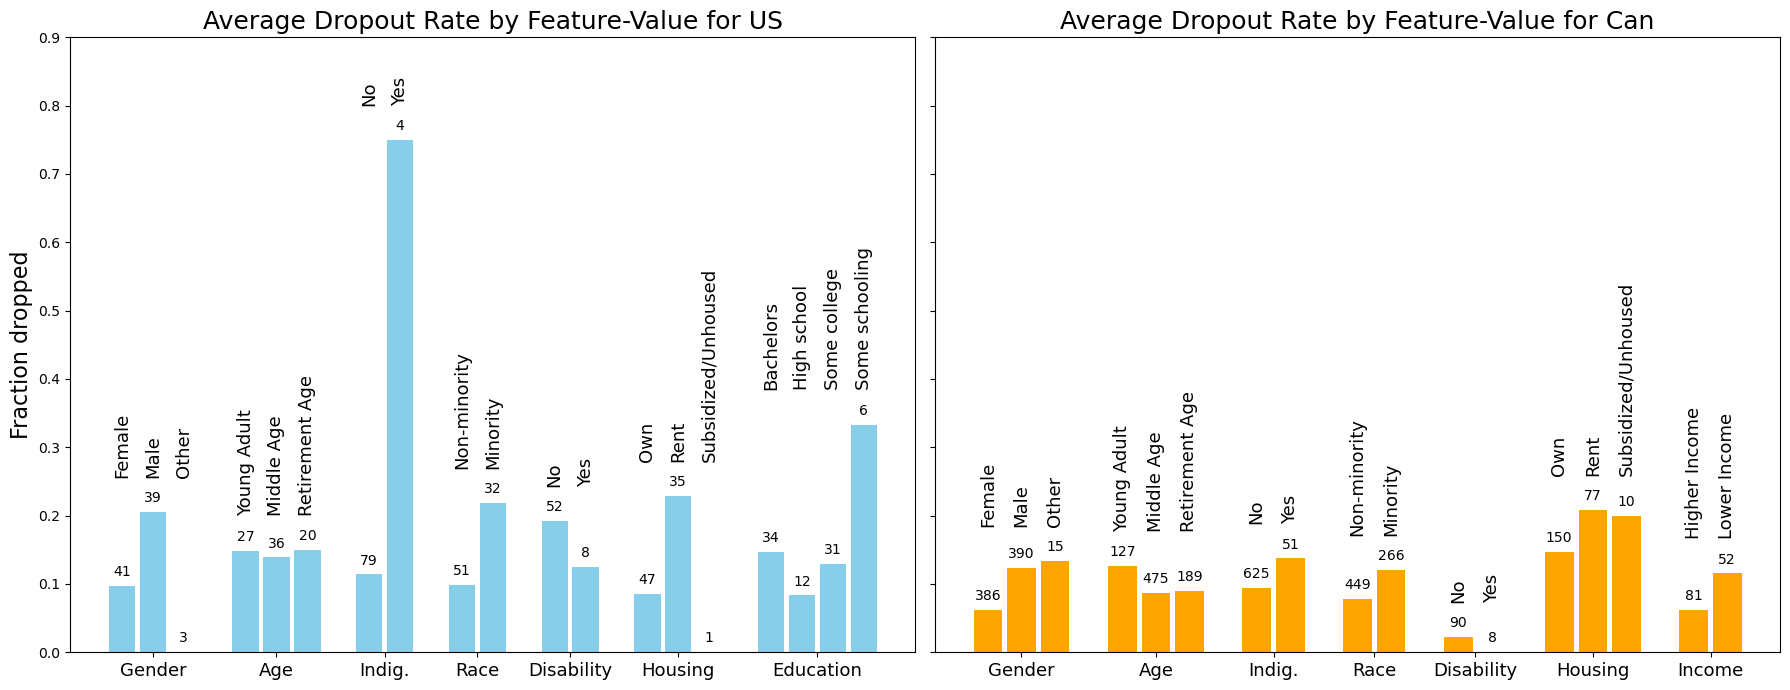

In [41]:
# Function to process each column individually
def process_column(column, df):
    unique_values = df[column].dropna().unique()
    # print(unique_values)
    results = {}
    counts = {}
    
    for value in unique_values:
        mask = df[column] == value
        filtered_data = df.loc[mask, 'DROPPED']
        results[value] = filtered_data.mean()
        counts[value] = filtered_data.notna().sum()  # Correctly count the occurrences of each value
        
    return results, counts

instances_in_dataset = {'US': ['DESCHUTES', 'PETALUMA', 'EUGENE'], 'MASS_ALDFC': ["ABG", "ABI", "ABP", "ABQ", "ABS", "ABU"], 'MASS_ALDFN': 
    ["ABY", "ABZ", "ACA", "ACB"], 'Can': ['AAZ', 'ABD', 'ABI', 'ABB', 'ABA', 'ABC', 'ABP', 'ABG', 'ABJ', 'ABS', 'ABX', 'ABL', 'ABZ', 'ABU', 'ABR', 'ABT', 'ABY', 'ABK', 'ABQ', 'ACA', 'ABE', 'ACB']}

def plot_drop_rates(dataset1, dataset2):
    columns_to_process = ['GENDER', 'AGE', 'INDIGENOUS', 'RACIAL_MINORITY', 'DISABILITY', 'HOUSING', 'INCOME', 'EDUCATION']
    colors = {dataset1: 'skyblue', dataset2: 'orange'}

    # Prepare data for plotting
    all_values = []
    all_averages = {dataset1: [], dataset2: []}
    all_counts = {dataset1: [], dataset2: []}
    value_labels_1 = []
    value_labels_2 = []
    column_labels = []
    positions_d1 = []
    positions_d2 = []
    column_positions_d1 = []
    column_positions_d2 = []
    current_position_d1 = 0
    current_position_d2 = 0

    col_max_d1 = []
    col_max_d2 = []
    for col in columns_to_process:
        # if col == 'INCOME' and dataset1 == 'US':
        #     continue
        # if col == 'EDUCATION' and dataset2 == 'Can':
        #     continue

        results1, counts1 = process_column(col, df_merged[df_merged['DATA_ID'].isin(instances_in_dataset[dataset1])])
        results2, counts2 = process_column(col, df_merged[df_merged['DATA_ID'].isin(instances_in_dataset[dataset2])])
        
        if col == 'AGE':
            unique_values = ['Young Adult', 'Middle Age', 'Retirement Age']
        else:
            unique_values = sorted(set(results1.keys()).union(set(results2.keys())))
        values_positions_d1 = list(range(current_position_d1, current_position_d1 + len(unique_values)))
        values_positions_d2 = list(range(current_position_d2, current_position_d2 + len(unique_values)))

        col_max_avg1 = 0
        col_max_avg2 = 0
        for value, pos1, pos2 in zip(unique_values, values_positions_d1, values_positions_d2):
            if col != 'INCOME':
                positions_d1.append(pos1)
                v1 = results1.get(value, 0)
                all_averages[dataset1].append(v1)
                col_max_avg1 = max(col_max_avg1, v1)
                all_counts[dataset1].append(counts1.get(value, 0))
                if col == 'RACIAL_MINORITY':
                    if value == 'Yes':
                        value_labels_1.append('Minority')
                    elif value == 'No':
                        value_labels_1.append('Non-minority')
                    else:
                        value_labels_1.append(f'{value}')
                else:
                    value_labels_1.append(f'{value}')
            
            if col != 'EDUCATION':
                positions_d2.append(pos2)
                v2 = results2.get(value, 0)
                all_averages[dataset2].append(v2)
                col_max_avg2 = max(col_max_avg2, v2)
                all_counts[dataset2].append(counts2.get(value, 0))
                if col == 'RACIAL_MINORITY':
                    if value == 'Yes':
                        value_labels_2.append('Minority')
                    elif value == 'No':
                        value_labels_2.append('Non-minority')
                    else:
                        value_labels_2.append(f'{value}')
                else:
                    value_labels_2.append(f'{value}')
                
            
          # Center label under bars
        if col == 'RACIAL_MINORITY':
            column_labels.append('Race')
        elif col == 'INDIGENOUS':
            column_labels.append('Indig.')
        else:
            column_labels.append(col.lower().replace('_', ' ').capitalize())
            
        if col != 'INCOME':
            column_positions_d1.append(np.mean(values_positions_d1))
            col_max_d1.extend([col_max_avg1] * len(unique_values))
            current_position_d1 += len(unique_values) + 1  # Spacing
        if col != 'EDUCATION':
            column_positions_d2.append(np.mean(values_positions_d2))
            col_max_d2.extend([col_max_avg2] * len(unique_values))
            current_position_d2 += len(unique_values) + 1  # Spacing

    # Plotting
    bar_width = 0.85
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 7), sharey=True)
    
    pos_array_d1 = np.array(positions_d1)
    pos_array_d2 = np.array(positions_d2)
    
    col_labels_d1 = [label for label in column_labels if label != 'Income']
    col_labels_d2 = [label for label in column_labels if label != 'Education']
    
    # Plot for dataset1
    axes[0].bar(pos_array_d1, all_averages[dataset1], bar_width, label=dataset1, color=colors[dataset1])
    axes[0].set_xticks(column_positions_d1)
    axes[0].set_xticklabels(col_labels_d1, rotation=0, ha='center', fontsize=13)
    axes[0].set_ylabel('Fraction dropped', fontsize=16)
    axes[0].set_ylim(0, 0.9)
    axes[0].set_title(f'Average Dropout Rate by Feature-Value for {dataset1}', fontsize=18)
    
    # Annotating values above bars for dataset1
    for i, (pos, value, avg1) in enumerate(zip(pos_array_d1, value_labels_1, all_averages[dataset1])):
        axes[0].text(pos, col_max_d1[i] + 0.05, value.replace('_', ' '), ha='center', va='bottom', rotation=90, fontsize=13)
        count1 = all_counts[dataset1][i]
        if count1 > 0:
            axes[0].text(pos, avg1 + 0.01, f'{count1}', rotation=0, ha='center', va='bottom', fontsize=10)
        else:
            axes[0].text(pos, avg1 + 0.01, 'n/a', rotation=0, ha='center', va='bottom', fontsize=10)
    
    # Plot for dataset2
    axes[1].bar(pos_array_d2, all_averages[dataset2], bar_width, label=dataset2, color=colors[dataset2])
    axes[1].set_xticks(column_positions_d2)
    axes[1].set_xticklabels(col_labels_d2, rotation=0, ha='center', fontsize=13)
    axes[1].set_ylim(0, 0.9)
    axes[1].set_title(f'Average Dropout Rate by Feature-Value for {dataset2}', fontsize=18)
    
    # Annotating values above bars for dataset2
    for i, (pos, value, avg2) in enumerate(zip(pos_array_d2, value_labels_2, all_averages[dataset2])):
        axes[1].text(pos, col_max_d2[i] + 0.05, value.replace('_', ' '), ha='center', va='bottom', rotation=90, fontsize=13)
        count2 = all_counts[dataset2][i]
        if count2 > 0:
            axes[1].text(pos, avg2 + 0.01, f'{count2}', rotation=0, ha='center', va='bottom', fontsize=10)
        else:
            axes[1].text(pos, avg2 + 0.01, 'n/a', rotation=0, ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.savefig(f'../../plots/{dataset1}_{dataset2}_drop_rates_side_by_side.pdf')

plot_drop_rates('US', 'Can')

In [42]:
def plot_drop_rates_scatter(datasets):
    columns_to_process = ['GENDER', 'AGE', 'INDIGENOUS', 'RACIAL_MINORITY', 'DISABILITY', 'HOUSING', 'INCOME', 'EDUCATION']
    colors = {'HD': 'blue', 'MASS_ALDFC': 'green', 'MASS_ALDFN': 'orange', 'MASS_REST': 'red'}

    # Prepare data for plotting
    all_values = []
    all_averages = []
    # all_counts = []  # List to hold counts for annotations
    labels = []
    positions = []
    current_position = 0
    color_labels = []
    all_positions = []
    sizes=[]
    
    for col in columns_to_process:
        unique_values = sorted(list(df_merged[col].dropna().unique()))
        new_indices = list(range(current_position, current_position + len(unique_values)))
        pos_mapping = {value: pos for value, pos in zip(unique_values, new_indices)}
        all_positions.extend(new_indices)
        current_position += len(unique_values) + 1  # +1 for spacing
        labels.extend([f"{col}: {v}" for v in unique_values])
        
        for dataset in datasets:
            for instance in instances_in_dataset[dataset]:
                results, counts = process_column(col, df_merged[df_merged['DATA_ID'] == instance])
                for column_val, drop_rate in results.items():
                    all_values.append(column_val)
                    all_averages.append(drop_rate)
                    if dataset == 'HD':
                        color_dataset = 'HD'
                    elif instance in instances_in_dataset['MASS_ALDFC']:
                        color_dataset = 'MASS_ALDFC'
                    elif instance in instances_in_dataset['MASS_ALDFN']:
                        color_dataset = 'MASS_ALDFN'
                    else:
                        color_dataset = 'MASS_REST'
                    color_labels.append(colors[color_dataset])
                    positions.append(pos_mapping[column_val])
                    sizes.append(counts[column_val] * 10)  # Adjust the multiplier as needed for better visualization

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.scatter(positions, all_averages, c=color_labels, s=sizes, alpha=0.6)
    plt.xticks(all_positions, labels, rotation=90)
    plt.ylabel('Fraction dropped')
    plt.ylim(0, 1.1)
    plt.title('Average Dropout Rate by Feature-Value for Each Instance')

    # Annotating sample sizes above points
    # for pos, avg, count in zip(positions, all_averages, all_counts):
    #     plt.text(pos, avg + 0.01, f'n={count}', ha='center', va='bottom', rotation=90, fontsize=8)

    # Create a legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[dataset], markersize=10) for dataset in colors]
    labels = list(colors.keys())
    plt.legend(handles, labels, title='Dataset')

    plt.tight_layout()
    plt.savefig(f'../../plots/drop_rates/drop_rates_scatter_{datasets}.png')

# Plot drop rates as scatter plot
plot_drop_rates_scatter(['HD'])


KeyError: 'HD'

In [ ]:
plot_drop_rates_scatter(['MASS_ALDFC'])


In [ ]:
plot_drop_rates_scatter(['MASS_ALDFN'])


In [ ]:
plot_drop_rates_scatter(['MASS_ALL'])
